In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import mpl_toolkits.mplot3d.axes3d as axes3d
from tensorflow_probability import distributions as tfd

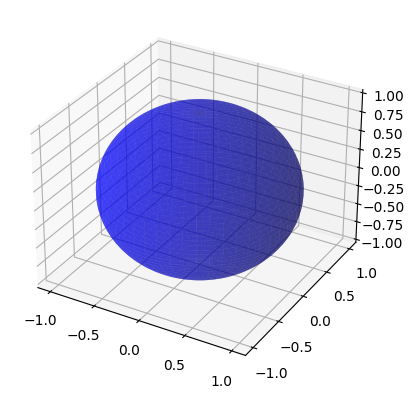

In [9]:
# Create a sphere
r = 1
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)

# Create a 3D plot
axsphere = plt.axes(projection='3d')
axsphere.plot_surface(x, y, z, color='b', alpha=0.5)

# Show the plot
plt.show()

400


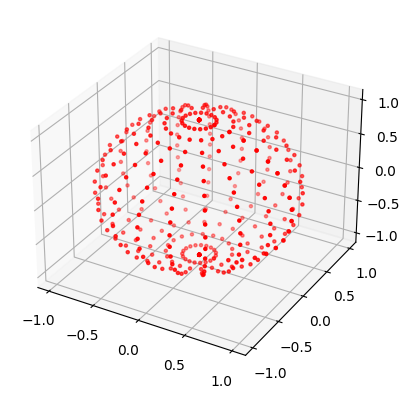

In [10]:
n = 20
u, v = np.mgrid[0:2*np.pi:n*1j, 0:np.pi:n*1j]

x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plot the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=5, color="r")

# count number of points
print(x.size)

plt.show()

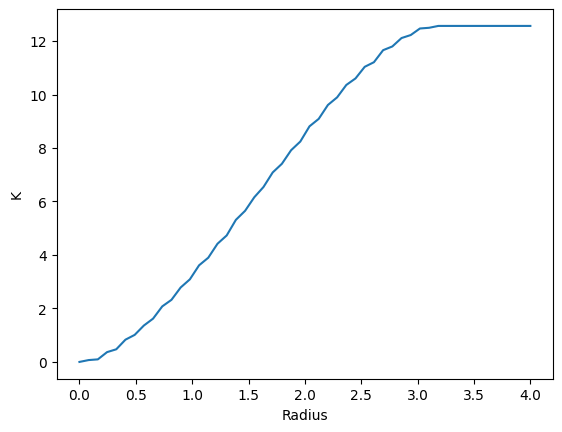

In [5]:
# distance between two points on a sphere 
# https://www.cuemath.com/trigonometry/trigonometric-table/
# Source: https://www.math.ksu.edu/~dbski/writings/haversine.pdf
x = np.ravel(x)
y = np.ravel(y)
z = np.ravel(z)
data = np.array([x,y,z]).T

def distance(radii,vec1,vec2):
    dist = radii * abs(math.acos(np.dot(vec1, vec2)/radii**2))
    return dist

def pairDistances(r, data):
    npts = np.shape(data)[0]
    dist = []
    for i in range(npts):
        for j in range(i+1, npts):
            dist.append(distance(r, data[i], data[j]))
    return dist

# Calculating the distance between all pairs of points
def surfaceArea(r):
    area = 4 * math.pi * r**2
    return area

def ripleyK(r, data, radii):
    K = np.zeros_like(radii)
    area = surfaceArea(r)
    dist = pairDistances(r, data)
    pair_num = len(dist)
    intensity = pair_num / area
    for i in range(len(radii)):
        K[i] = np.sum(dist < radii[i])
    K = K / intensity
    return K

radii = np.linspace(0, 4, 50)

kt = ripleyK(1, data, radii)

# Plotting the Ripley's K function
plt.plot(radii, kt)
plt.xlabel('Radius')
plt.ylabel('K')
plt.show()

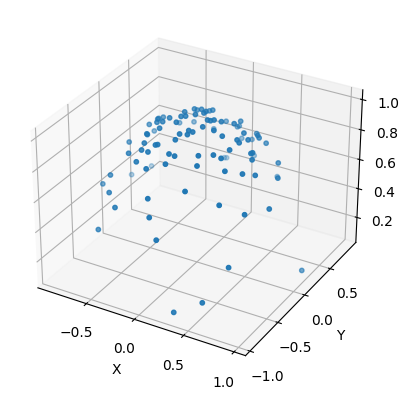

In [6]:
# define parameters of von Mises-Fisher distribution
mu = [0, 0, 1.]
kappa = 5

# create distribution
vmf = tfd.VonMisesFisher(mu, kappa)

# normalize samples to unit sphere
samples = vmf.sample(100)
samples = samples.numpy()
samples = samples / np.linalg.norm(samples, axis=1, keepdims=True)

# create 3D plot of samples on sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:,0], samples[:,1], samples[:,2], s=10)

# set axis limits and labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# show plot
plt.show()

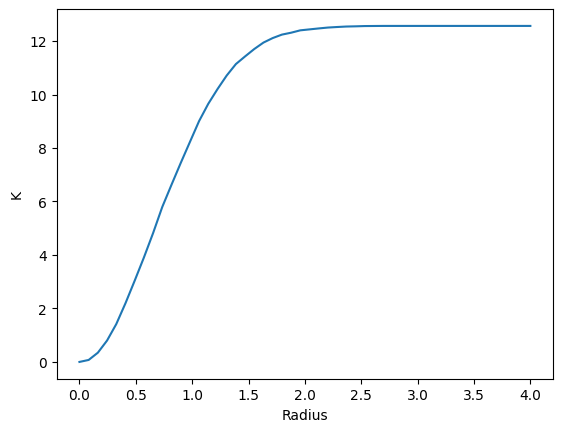

In [7]:
radii = np.linspace(0, 4, 50)

kt = ripleyK(1, samples, radii)

# Plotting the Ripley's K function
plt.plot(radii, kt)
plt.xlabel('Radius')
plt.ylabel('K')
plt.show()